<a href="https://colab.research.google.com/github/Nusrahkhan/AIML-PRACTICE/blob/main/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# load and splits the dataset into training and testing

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

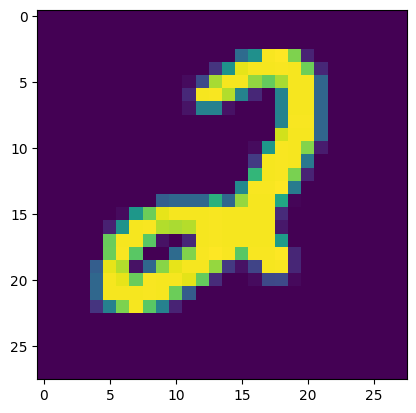

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[233])

In [ ]:
X_train = X_train/255
X_test = X_test/255

# normalises pixel values of images
'''
Why 255?
Each image is 28×28 pixels, and each pixel value ranges from 0 to 255 (grayscale intensity).

Dividing by 255 scales all pixel values to a range of 0.0 to 1.0.

'''

'\nWhy 255?\nEach image is 28×28 pixels, and each pixel value ranges from 0 to 255 (grayscale intensity).\n\nDividing by 255 scales all pixel values to a range of 0.0 to 1.0.\n\n'

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential() # initialises a seqential model, so basically the layers are added one after the other
# so the models output from one layer is passed on as input to the next layer

model.add(Flatten(input_shape=(28,28))) # 2D input to 1D vector
model.add(Dense(64,activation='relu')) # rectified linear unit(turns -ve to zeros and keeps positive as is)
model.add(Dense(26,activation='relu'))
model.add(Dense(12,activation='softmax')) # converts raw output values into probabilities


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 26)             │         1,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 12)             │           324 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,254 (204.12 KB)

 Trainable params: 52,254 (204.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# loss function is used to calculate how well the model's predictions match the actual labels during training
# Sparse Categorical Cross-Entropy because of multi class classfication
# optimizer controls how the models weights are updated

In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)
#bascially trains the model on data to classify images into correct labels and
#epochs is how many times the models will look at the training dataset
#20% of the training data will be used for validation during training
#history object keeps track of how well the model did during each epoch.

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8246 - loss: 0.6089 - val_accuracy: 0.9459 - val_loss: 0.1894
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9516 - loss: 0.1631 - val_accuracy: 0.9611 - val_loss: 0.1357
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9667 - loss: 0.1128 - val_accuracy: 0.9657 - val_loss: 0.1196
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9724 - loss: 0.0902 - val_accuracy: 0.9658 - val_loss: 0.1152
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9783 - loss: 0.0702 - val_accuracy: 0.9680 - val_loss: 0.1087
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9819 - loss: 0.0576 - val_accuracy: 0.9655 - val_loss: 0.1203
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0478 - val_accuracy: 0.9679 - val_loss: 0.1122
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0420 

In [ ]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
#y_prob contains the predicted probabilities for each
#argmax() is a function that returns the index of the maximum value in an array

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9722

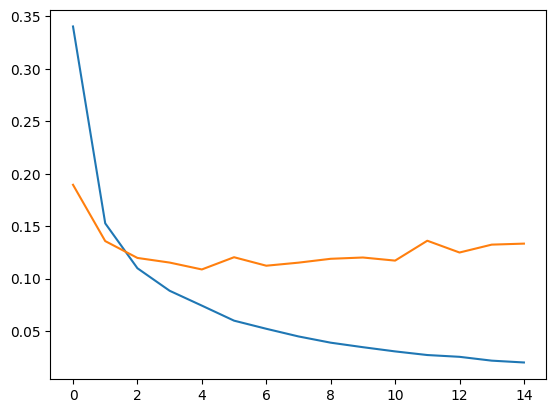

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#Training loss: How well the model is learning on the training data.

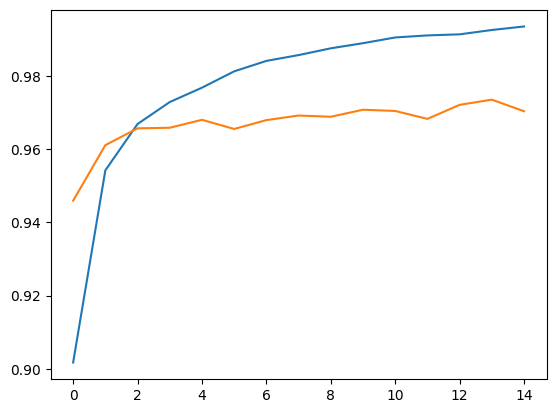

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

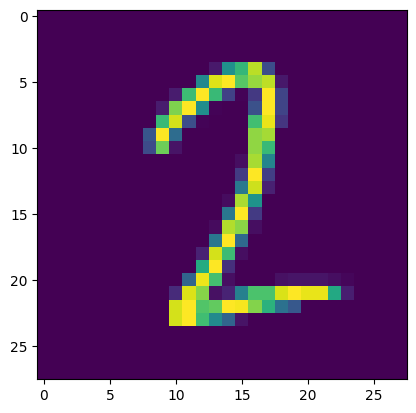

In [ ]:
plt.imshow(X_test[456])

In [ ]:
model.predict(X_test[456].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([2])